# Exploratory data analysis (EDA)

# 1) Set up

For the preparations lets first import the necessary libraries and load the files needed for our EDA

In [1]:
#Importing fundamental data exploration libaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [2]:
# load the dataset

df_houseSales = pd.read_csv("../data/King_County_House_prices_dataset.csv")
df_houseSales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# display data types

df_houseSales.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

The date & sqft_basement contain strings. In order work with these variables we need to convert them into a datetime object and integers respectively. We care about that later on.

In [35]:
# display statistical summary

df_houseSales.describe().round(1)

,price,condition,grade,sqft_living,sqft_above,yr_renovated,bathrooms,bedrooms,floors,sqft_lot
count,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,540296.6,3.4,7.7,2080.3,1788.6,68.8,2.1,3.4,1.5,15099.4
std,367368.1,0.7,1.2,918.1,827.8,364.0,0.8,0.9,0.5,41412.6
min,78000.0,1.0,3.0,370.0,370.0,0.0,0.5,1.0,1.0,520.0
25%,322000.0,3.0,7.0,1430.0,1190.0,0.0,1.8,3.0,1.0,5040.0
50%,450000.0,3.0,7.0,1910.0,1560.0,0.0,2.2,3.0,1.5,7618.0
75%,645000.0,4.0,8.0,2550.0,2210.0,0.0,2.5,4.0,2.0,10685.0
max,7700000.0,5.0,13.0,13540.0,9410.0,2015.0,8.0,33.0,3.5,1651359.0


In [5]:
# get rid of data that is not important for particular task

df_houseSales_dic = {"date":df_houseSales["date"],"price": df_houseSales["price"], 
                            "condition":df_houseSales["condition"], 
                           "grade":df_houseSales["grade"], 
                          "sqft_living":df_houseSales["sqft_living"],
                    "sqft_above":df_houseSales["sqft_above"],"yr_renovated":df_houseSales["yr_renovated"],
                    "bathrooms":df_houseSales["bathrooms"],"bedrooms":df_houseSales["bedrooms"],
                    "floors":df_houseSales["floors"],"sqft_lot":df_houseSales["sqft_lot"],
                    "sqft_basement":df_houseSales["sqft_basement"]}

df_houseSales = pd.DataFrame(data=df_houseSales_dic)
df_houseSales.head()

,date,price,condition,grade,sqft_living,sqft_above,yr_renovated,bathrooms,bedrooms,floors,sqft_lot,sqft_basement
0,10/13/2014,221900.0,3,7,1180,1180,0.0,1.00,3,1.0,5650,0.0
1,12/9/2014,538000.0,3,7,2570,2170,1991.0,2.25,3,2.0,7242,400.0
2,2/25/2015,180000.0,3,6,770,770,NaN,1.00,2,1.0,10000,0.0
3,12/9/2014,604000.0,5,7,1960,1050,0.0,3.00,4,1.0,5000,910.0
4,2/18/2015,510000.0,3,8,1680,1680,0.0,2.00,3,1.0,8080,0.0


In [6]:
#check for missing data

total = df_houseSales.isnull().sum().sort_values(ascending=False)
percent = (df_houseSales.isnull().sum()/df_houseSales.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
yr_renovated,3842,0.177895
date,0,0.000000
price,0,0.000000
condition,0,0.000000
grade,0,0.000000
sqft_living,0,0.000000
sqft_above,0,0.000000
bathrooms,0,0.000000
bedrooms,0,0.000000
floors,0,0.000000


In [7]:
#replace missing data of column yr_renovated & convert into integer

df_houseSales['yr_renovated'].replace(np.nan,"0", inplace=True)
df_houseSales['yr_renovated'] = df_houseSales['yr_renovated'].astype(int)
type(df_houseSales['yr_renovated'][5])

numpy.int64

In [8]:
total = df_houseSales.isnull().sum().sort_values(ascending=False)
percent = (df_houseSales.isnull().sum()/df_houseSales.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
date,0,0.0
price,0,0.0
condition,0,0.0
grade,0,0.0
sqft_living,0,0.0
sqft_above,0,0.0
yr_renovated,0,0.0
bathrooms,0,0.0
bedrooms,0,0.0
floors,0,0.0


Now we would like to get an overview of the sales price distribution. Thus, we plot the corresponding histogram

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-45-29fb1f7d9ef8>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(labels, fontsize=12);


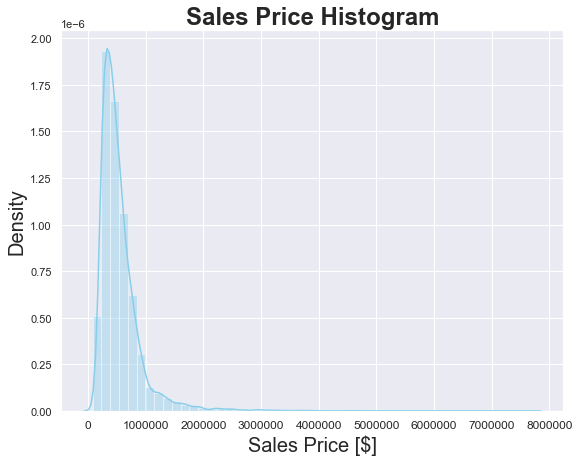

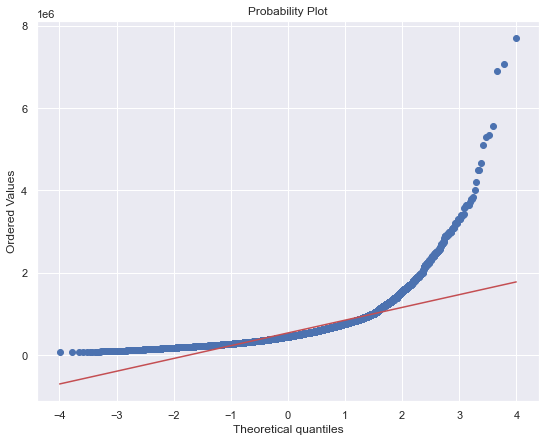

In [45]:
labels = ["0", "0", "1000000", "2000000", "3000000", "4000000", "5000000", "6000000", "7000000", "8000000"]
plot=sns.distplot(df_houseSales.price, color="skyblue", kde=True)

#plot=sns.distplot(df_houseSales['price'], bins=50,kde=False);
sns.set(rc={'figure.figsize':(9,7)})
fig = plt.figure()
plot.set_title('Sales Price Histogram',fontdict= { 'fontsize': 24, 'fontweight':'bold'})
plot.set_xlabel('Sales Price [$]',fontsize = 20 )
plot.set_ylabel('Density',fontsize = 20)
#plot.axvline(x=322000, color='r', linestyle='--')
#plot.axvline(x=1160000, color='b', linestyle='--')
#plot.axvline(x=645000, color='g', linestyle='--')
#plot.axvline(x=540000, color='k', linestyle='--')
plot.set_xticklabels(labels, fontsize=12);
#plot.set_yticklabels(labels, fontsize=15);
res = stats.probplot(df_houseSales['price'], plot=plt)

In [10]:
# get corresponding skewness & kurtosis

print("skewness:", df_houseSales.price.skew())
print("kurtosis:", df_houseSales.price.kurt())

skewness: 4.023364652271239
kurtosis: 34.54135857673376


Given from the histogram: The saleprice has appreciable positive skewness, deviates from the normal distribution and shows peakedness. Outliers can be seen above the 95th percentile. The distribution does not follow a normal distribution as seen from the Q-Q plot.

# 2) Data exploration

In this section I will be investigating different features by plotting them to determine the relationship to price.

## 2.1) Sunshine Duration - Sales Price correlation

To proof the first hypothesis I want to have a closer look to the sunshine duration in Seattle of 2104/15. It was hard to find a whole lot of historical weather data. I calculated the mean of the monthly averages of the following resources: https://en.climate-data.org, https://www.allmetsat.com, https://www.klimatabelle.de, https://www.wetter.de

In [11]:
sunshine_dic = {"Jan":[69,2.4*31,2.5*31],"Feb":[108,4.5*28,3.5*28],"Mar":[178,5*31,5*28],
               "Apr":[207,6.9*30,6.4*30],"May":[253,7.7*31,7.9*31],"Jun":[268,7.9*30,7.8*30],
               "Jul":[312,9.5*31,9.8*31],"Aug":[281,7.3*31,8.0*31],"Sep":[221,6.6*30,6.7*30],
               "Oct":[142,3.7*31,4*31],"Nov":[72,2.5*30,2.6*30],"Dec":[52,2.1*31,2*31]}
                
sunshine_dic = pd.DataFrame(data=sunshine_dic)
sunshine_dic

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,69.0,108.0,178,207.0,253.0,268.0,312.0,281.0,221.0,142.0,72.0,52.0
1,74.4,126.0,155,207.0,238.7,237.0,294.5,226.3,198.0,114.7,75.0,65.1
2,77.5,98.0,140,192.0,244.9,234.0,303.8,248.0,201.0,124.0,78.0,62.0


In [12]:
# get the mean of the monthly averages

sunshine_dic.mean()

Jan     73.633333
Feb    110.666667
Mar    157.666667
Apr    202.000000
May    245.533333
Jun    246.333333
Jul    303.433333
Aug    251.766667
Sep    206.666667
Oct    126.900000
Nov     75.000000
Dec     59.700000
dtype: float64

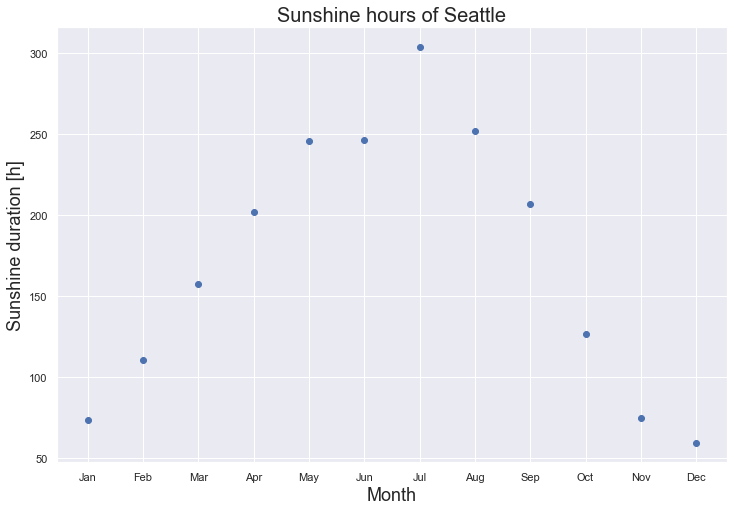

In [13]:
# plot its distribution against date

plt.figure(figsize=(12, 8))
plt.scatter(sunshine_dic.mean().index, sunshine_dic.mean())
plt.xlabel("Month", size=18)
plt.ylabel("Sunshine duration [h]", size=18)
plt.title("Sunshine hours of Seattle", size=20);
#plt.set_xticklabels(labels, size=15);
#plt.set_yticklabels(labels, size=15);

A clearly linear trend from January to July increasing & decreasing from that point until December

In [14]:
# convert the date into datetime object

from datetime import date
from datetime import datetime

df_houseSales.date = [datetime.strptime(d,"%m/%d/%Y").date() for d in df_houseSales.date]

No handles with labels found to put in legend.


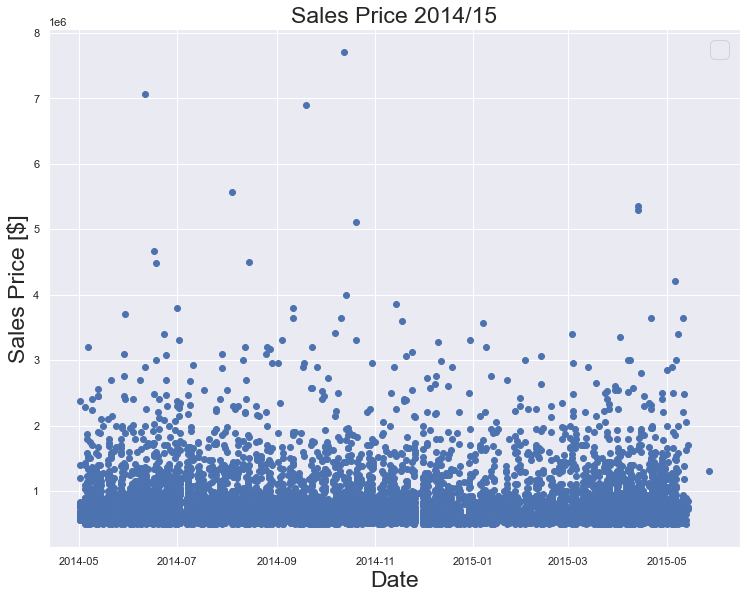

In [15]:
# filter sales prices 
df_houseSales_expensive = df_houseSales[df_houseSales.price >= 500000]

# set up plot
fig = plt.figure(figsize=(12,8))
ax= fig.add_axes([0.1,0.1,0.8,0.9])
ax.scatter(df_houseSales_expensive.date, df_houseSales_expensive.price)
ax.legend(fontsize=23)
ax.set_title('Sales Price 2014/15',fontsize=23)
ax.set_ylabel('Sales Price [$]',fontsize=23)
ax.set_xlabel('Date',fontsize=23)

# show plot
plt.show();

The sales price is scattered all over the place, thus no great correlation between sunshine hours % sales price.

## 2.2) Season - Sales Price correlation

My second hypothesis claims that it is better to sell during school holidays. Thus, I want to have a closer look between summer (school holidays from June to September) & winter. Of course this analysis goes somewaht hand in hand with the analysis of 2.1).

In [16]:
# filter dates to get summer time

start_date_2014 = "6/2/2014"
end_date_2014 = "9/1/2014"
start_date=datetime.strptime(start_date_2014, "%m/%d/%Y").date()
end_date=datetime.strptime(end_date_2014, "%m/%d/%Y").date()
summer_months = df_houseSales["date"] >= start_date
end_months = df_houseSales["date"] <= end_date
between_two_dates = summer_months & end_months
df_summer = df_houseSales.loc[between_two_dates]
df_summer.head()

,date,price,condition,grade,sqft_living,sqft_above,yr_renovated,bathrooms,bedrooms,floors,sqft_lot,sqft_basement
6,2014-06-27,257500.0,3,7,1715,1715,0,2.25,3,2.0,6819,?
16,2014-07-31,395000.0,3,7,1890,1890,0,2.00,3,2.0,14040,0.0
21,2014-08-26,2000000.0,3,9,3050,2330,0,2.75,3,1.0,44867,720.0
22,2014-07-03,285000.0,3,8,2270,2270,0,2.50,5,2.0,6300,0.0
26,2014-06-26,937000.0,3,8,2450,1750,0,1.75,3,2.0,2691,700.0


In [17]:
# filter dates to get winter time

start_date_2014 = "9/1/2014"
end_date_2014 = "5/27/2015"
start_date=datetime.strptime(start_date_2014, "%m/%d/%Y").date()
end_date=datetime.strptime(end_date_2014, "%m/%d/%Y").date()
summer_months = df_houseSales["date"] >= start_date
end_months = df_houseSales["date"] <= end_date
between_two_dates = summer_months & end_months
df_winter = df_houseSales.loc[between_two_dates]
df_winter.head()

,date,price,condition,grade,sqft_living,sqft_above,yr_renovated,bathrooms,bedrooms,floors,sqft_lot,sqft_basement
0,2014-10-13,221900.0,3,7,1180,1180,0,1.00,3,1.0,5650,0.0
1,2014-12-09,538000.0,3,7,2570,2170,1991,2.25,3,2.0,7242,400.0
2,2015-02-25,180000.0,3,6,770,770,0,1.00,2,1.0,10000,0.0
3,2014-12-09,604000.0,5,7,1960,1050,0,3.00,4,1.0,5000,910.0
4,2015-02-18,510000.0,3,8,1680,1680,0,2.00,3,1.0,8080,0.0


No handles with labels found to put in legend.


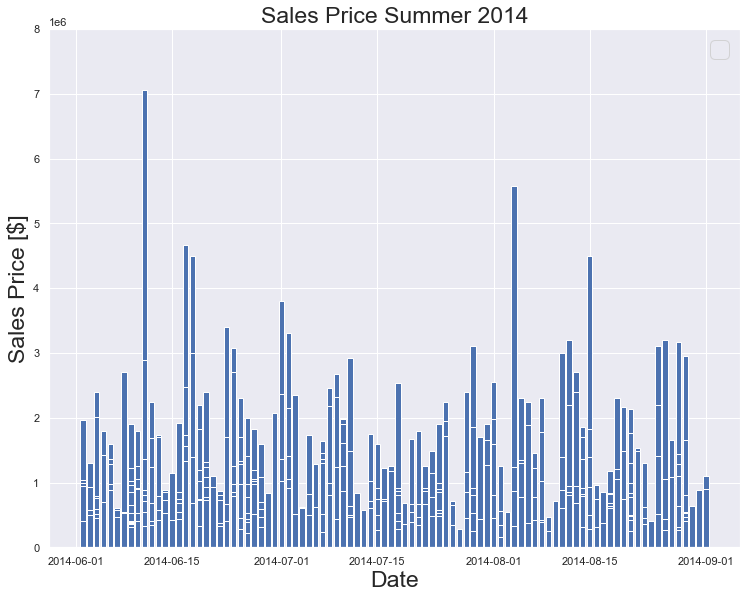

In [18]:
# set up plot for summer season

fig = plt.figure(figsize=(12,8))
ax= fig.add_axes([0.1,0.1,0.8,0.9])
ax.bar(df_summer.date, df_summer.price)
ax.legend(fontsize=23)
ax.set_title('Sales Price Summer 2014',fontsize=23)
ax.set_ylabel('Sales Price [$]',fontsize=23)
ax.set_xlabel('Date',fontsize=23)
plt.ylim(0, 8000000)
plt.show();

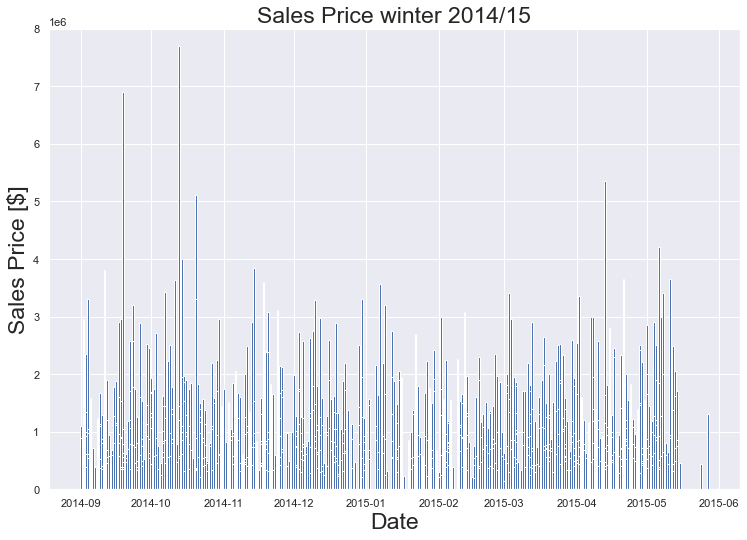

In [19]:
# set up plot for winter season

fig1 = plt.figure(figsize=(12,8))
ax1= fig1.add_axes([0.1,0.1,0.8,0.8])
ax1.bar(df_winter.date, df_winter.price)
#ax1.legend(fontsize=23)
ax1.set_title('Sales Price winter 2014/15',fontsize=23)
ax1.set_ylabel('Sales Price [$]',fontsize=23)
ax1.set_xlabel('Date',fontsize=23)
plt.ylim(0, 8000000)
plt.show();

Clearly the same pattern and scales for summer & winter.

## 2.3) Feature Engineering

We will look at further relationships of several features & the sales price.

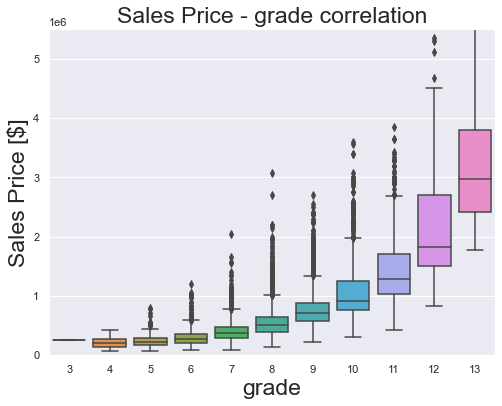

In [20]:
# see relation between price & grade

var = 'grade'
data = pd.concat([df_houseSales['price'], df_houseSales[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('Sales Price - grade correlation',fontsize=23)
ax.set_ylabel('Sales Price [$]',fontsize=23)
ax.set_xlabel('grade',fontsize=23)
#fig.set_xticklabels(labels, fontsize=15);
#fig.set_yticklabels(labels, fontsize=15);
fig.axis(ymin=0, ymax=5500000);

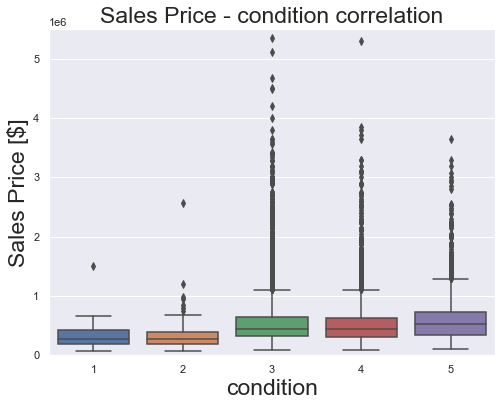

In [21]:
# see relation between price & condition

var = 'condition'
data = pd.concat([df_houseSales['price'], df_houseSales[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('Sales Price - condition correlation',fontsize=23)
ax.set_ylabel('Sales Price [$]',fontsize=23)
ax.set_xlabel('condition',fontsize=23)
#ax.set_xticklabels(labels, size=15);
#ax.set_yticklabels(size=15);
fig.axis(ymin=0, ymax=5500000);

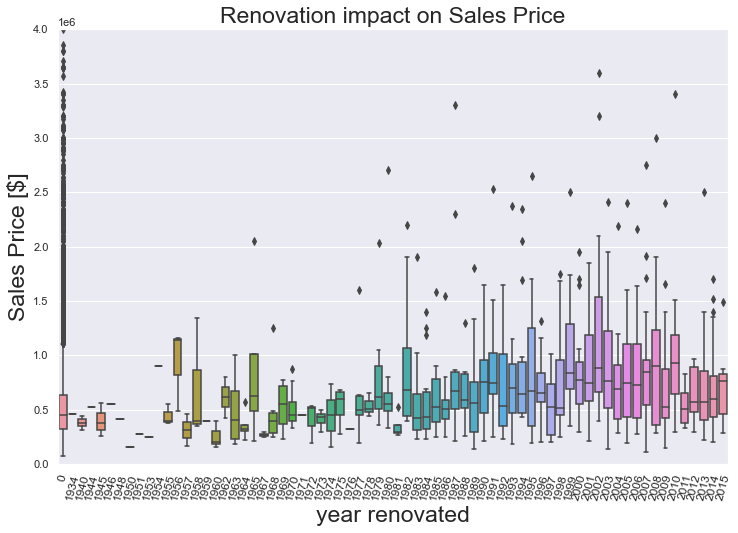

In [22]:
#drop missing data of column yr_renovated & convert existing data into integer

df_houseSales.dropna(subset = ['yr_renovated'], inplace=True)
df_houseSales['yr_renovated'] = df_houseSales['yr_renovated'].astype(int)

# see relation between price & condition

var = 'yr_renovated'
data = pd.concat([df_houseSales['price'], df_houseSales[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="price", data=data)
#fig.xlim([1934, 2015])
ax.set_title('Renovation impact on Sales Price',fontsize=23)
ax.set_ylabel('Sales Price [$]',fontsize=23)
ax.set_xlabel('year renovated',fontsize=23)
plt.xticks(fontsize= 12,rotation=75);
fig.axis(ymin=0, ymax=4000000);

Clearly, as the feature "grade" increases, so does the sales price. That is not so much the case for the "condition" or "renovation".

#### Next let's explore intercolleration between features.

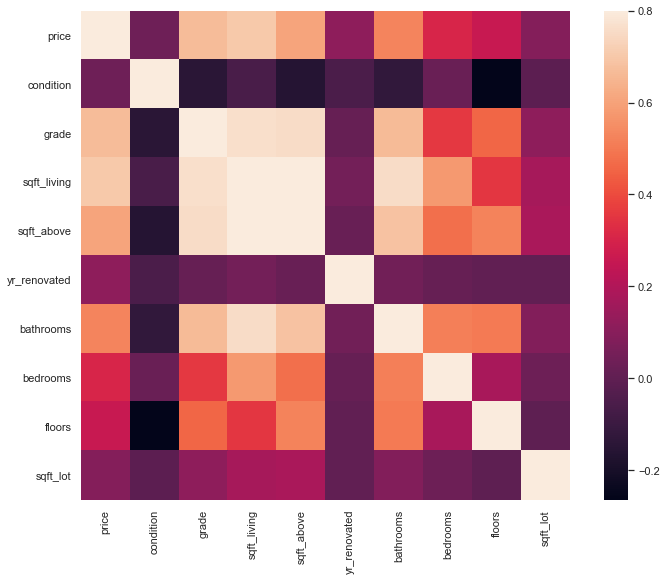

In [23]:
#correlation matrix

corrmat = df_houseSales.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

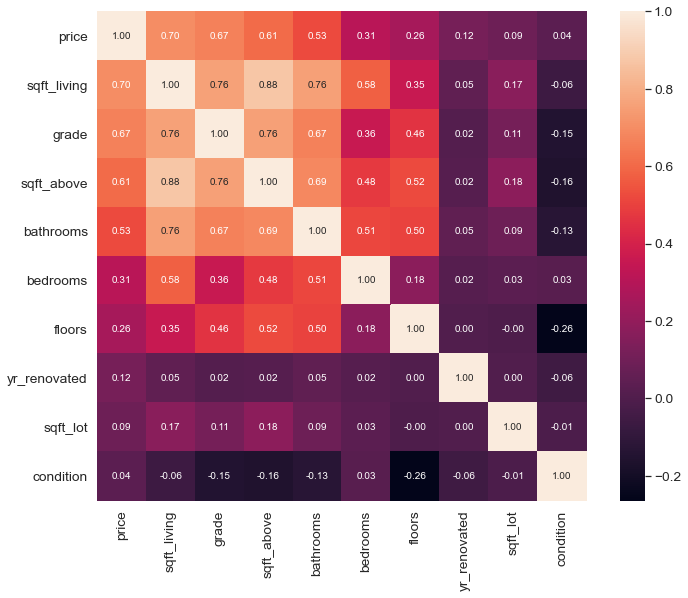

In [24]:
# sales price correlation matrix

k = 13 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df_houseSales[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Okay, so the features: square foot living area, grade, square feet above the ground level displayed the highest correlation wih the price of the house. Moreover, there is a high correlation of sqft_living with e.g. number of bathrooms and grade. This is common sense, as the square feet increase, so does the number of floors and bathrooms.

# 3) Modeling

Let's do some modeling. I will fit a linear regression as well as a multiple linear regression using ordinary least squares (OLS).

In [25]:
# import needed libraries 

import statsmodels.api as sm

In [26]:
# Prepare data for modeling
# Choose the predictor and add a constant term
X = df_houseSales[['bathrooms']] # independent variable
y = df_houseSales.price
# Our model needs an intercept so we add a column of 1s:
X = sm.add_constant(X)
#display(X.head())
#display(y.head())

In [27]:
# Create an OLS model
model = sm.OLS(y, X)
# use the data to calculate the intercept and slope
results = model.fit()
# return the output of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:42:54   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8712.6518   6224.769      1.400      0.162   -3488.356    2.09e+04
bathrooms   2.512e+05   2765.054     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17251.570   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882735.889
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.550   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# get intercept & slope

intercept, slope = results.params
intercept, slope

(8712.65175267159, 251241.76249515932)

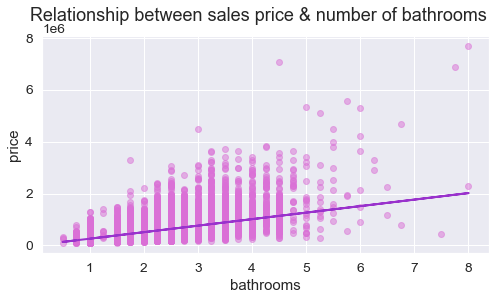

In [29]:
# Plotting the results of our model
fig, ax = plt.subplots(figsize=(8, 4))
x = df_houseSales.bathrooms
# add data points
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Relationship between sales price & number of bathrooms')
# plotting regression line
ax.plot(x, x*slope +intercept, '-', color='darkorchid', linewidth=2);
ax.set_ylabel("price");
ax.set_xlabel("bathrooms");

In [30]:
# same procedure with sqft_living as independent variable
X = df_houseSales[['sqft_living']] # independent variable
y = df_houseSales.price
# Our model needs an intercept so we add a column of 1s:
X = sm.add_constant(X)
#display(X.head())
#display(y.head())

# Create an OLS model
model = sm.OLS(y, X)
# use the data to calculate the intercept and slope
results = model.fit()
# return the output of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:42:55   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

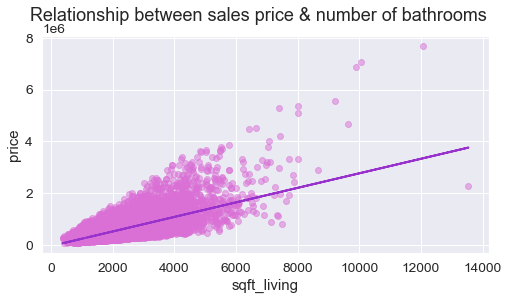

In [31]:
# get intercept & slope

intercept, slope = results.params
intercept, slope

# Plotting the results of our model
fig, ax = plt.subplots(figsize=(8, 4))
x = df_houseSales.sqft_living
# add data points
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Relationship between sales price & number of bathrooms')
# plotting regression line
ax.plot(x, x*slope +intercept, '-', color='darkorchid', linewidth=2);
ax.set_ylabel("price");
ax.set_xlabel("sqft_living");

## Multiple Linear Regression

In [32]:
# build a model with 4 independent variables: 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above'

X2 = df_houseSales[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above']]
X2 = sm.add_constant(X2)
y2 = df_houseSales.price
X2.head(n=2)

,const,bedrooms,bathrooms,sqft_living,sqft_above
0,1.0,3,1.00,1180,1180
1,1.0,3,2.25,2570,2170


In [33]:
# create OLS model

X2 = df_houseSales[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above']]
X2 = sm.add_constant(X2)
y2 = df_houseSales.price
model = sm.OLS(y2, X2).fit()

In [48]:
# show results

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     5570.
Date:                Sat, 07 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:28:21   Log-Likelihood:            -2.9974e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21592   BIC:                         5.995e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.143e+04   6997.070     11.638      0.000    6.77e+04    9.51e+04
bedrooms    -5.978e+04   2353.492    -25.400      0.000   -6.44e+04   -5.52e+04
bathrooms    9606.7903   3534.007      2.718      0.007    2679.875    1.65e+04
sqft_living   331.5011      4.611     71.893      0.000     322.463     340.539
sqft_above    -27.6466      4.429     -6.243      0.000     -36.327     -18.966
==============================================================================
Omnibus:                    14369.414   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           488204.760
Skew:                           2.721   Prob(JB):                         0.00
Kurtosis:                      25.647   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We receive a bad r_squared of around 0.5 and the corresponding intercept as well as slopes for each independent variable.